In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WeatherDataP.csv')
df.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


Text(0, 0.5, 'Humidity')

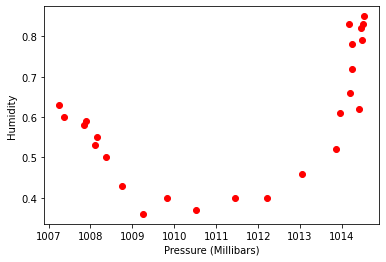

In [3]:
X = df[["Pressure (millibars)"]]
Y = df.Humidity

plt.scatter(X, Y, color='red')
plt.xlabel("Pressure (Millibars)")
plt.ylabel("Humidity")

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [12]:
model = LinearRegression()

In [14]:
model.fit(X_poly, Y)

LinearRegression()

In [15]:
Y_pred = model.predict(X_poly)

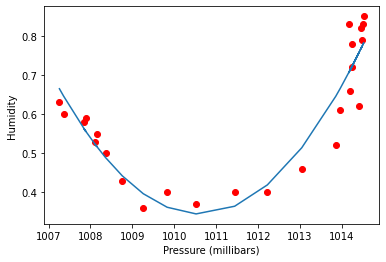

In [16]:
plt.scatter(X, Y, color='red')
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, Y_pred)

In [17]:
#Extracting the coefficients
theta0 = model.intercept_
_, theta1, theta2 = model.coef_

theta0, theta1, theta2

(29167.74604378328, -57.722545421135, 0.02855835729673671)

In [20]:
#Now using our regression model to make prediction
y_new = model.predict(pre_process.fit_transform([[1003]]))
y_new

array([1.99745212])

In [21]:
#From above we result we can expect a humidity value of 1.9974 for a pressure reading of 1003 millibars

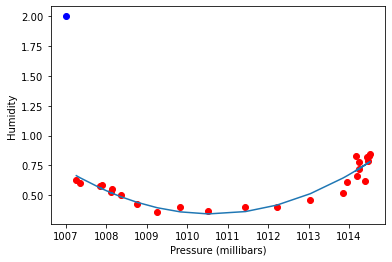

In [24]:
#plotting this new point in our graph
plt.scatter(X, Y, color='red')
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, Y_pred)
plt.scatter(1007, y_new, color='blue')

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_pred)

0.003358368372255664